In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler

In [39]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
labelencoder = LabelEncoder()
df=pd.read_csv('encoded_dataset.csv')
print(df["Streams"])
df['Streams']=labelencoder.fit_transform(df['Streams'])
X=df.iloc[:,3:]
Y=df.iloc[:,2:3]
print(Y)

#core-1
#cloud-0
#data-3
#cyber-2

0                 core
1      cloud computing
2      cloud computing
3         data science
4                 core
            ...       
395     cyber security
396    cloud computing
397               core
398               core
399       data science
Name: Streams, Length: 400, dtype: object
     Streams
0          1
1          0
2          0
3          3
4          1
..       ...
395        2
396        0
397        1
398        1
399        3

[400 rows x 1 columns]


In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=32)
X = pca.fit_transform(X)
X


array([[ 1.17312693, -1.02206993,  0.45192752, ..., -0.60153173,
        -0.00557369,  0.36635031],
       [-1.0763792 , -0.36517997,  1.08163359, ..., -0.04564461,
        -0.09000392,  0.23525977],
       [ 0.75442698,  1.6998867 , -1.69977524, ..., -0.54996714,
        -0.0317143 ,  0.77020606],
       ...,
       [ 0.33083244, -0.35336468,  0.02080421, ...,  0.34134595,
         0.06129949, -0.2801809 ],
       [ 0.24887545, -0.01006442, -1.1161445 , ..., -0.03308213,
        -0.18929156, -0.33410002],
       [ 1.69746678,  1.62853483,  0.55888679, ...,  1.2898387 ,
         0.86537973, -0.41218962]])

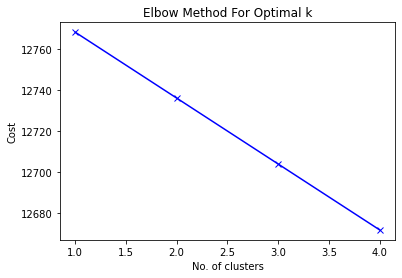

In [26]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=4,init = "random", n_init = 5)
clusters = kmode.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
count_0=[]
count_1=[]
count_2=[]
count_3=[]
for i in range(0,len(clusters)):
    if(clusters[i]==0):
        count_0.append(i)
    elif(clusters[i]==1):  
        count_1.append(i)
    elif(clusters[i]==2):
        count_2.append(i)
    elif(clusters[i]==3):
        count_3.append(i)
print(count_0)
print(count_1)
print(count_2)
print(count_3)

print(len(count_0))
print(len(count_1))
print(len(count_2))
print(len(count_3))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223

In [56]:
neg=0
pos=0
for i in count_0:
    if(Y.iloc[i,0]!=0):
        neg+=1
    else:
        pos+=1
for i in count_1:
    if(Y.iloc[i,0]!=1):
        neg+=1
    else:
        pos+=1
for i in count_2:
    if(Y.iloc[i,0]!=2):
        neg+=1
    else:
        pos+=1
for i in count_3:
    if(Y.iloc[i,0]!=3):
        neg+=1
    else:
        pos+=1
print(neg," ",pos)
print(pos/(pos+neg)*100)
# print(((65+35+54+25)/400)*100)
# print(((76+22+71+52)/400)*100)


349   51
12.75


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.39      0.62      0.48       127
           2       0.00      0.00      0.00        58
           3       0.51      0.62      0.56       162

    accuracy                           0.45       400
   macro avg       0.22      0.31      0.26       400
weighted avg       0.33      0.45      0.38       400



C:\Users\Jawahar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jawahar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jawahar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


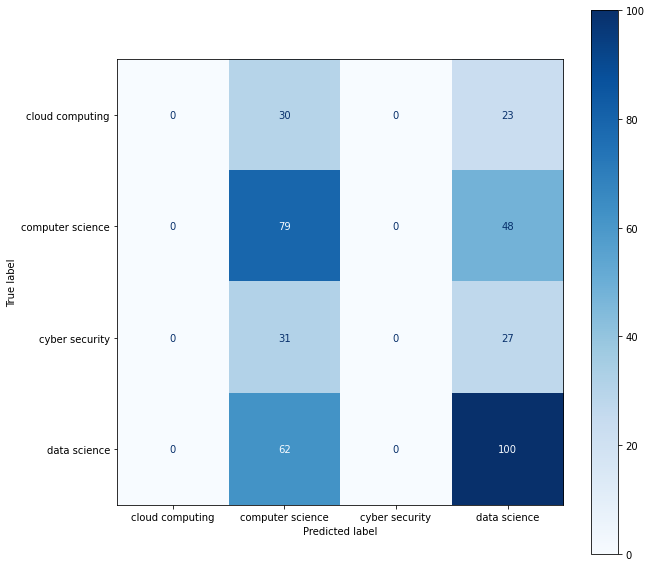

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
label=["cloud computing","computer science","cyber security","data science"]
disp = ConfusionMatrixDisplay.from_predictions(Y,y_pred,labels=[0,1,2,3],cmap=plt.cm.Blues,display_labels=["cloud computing","computer science","cyber security","data science"], values_format='',  ) 
fig = disp.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10)  
                                        
                                        
from sklearn import metrics
print(metrics.classification_report(Y, y_pred))

In [57]:
#enhanced kmode-cluster code
arr=X.to_numpy()
n=len(arr)     #rows
d=len(arr[0])  #columns
k=1          #features

#random selection of initial clusters
import random
r=random.randint(0,399)
# print(r)
ran=arr[r]
ind_1=-1
ind_2=-1
ind_3=-1
# print(ran)
C=[]
n=len(arr)
m=len(arr[0])
dup_mode=[]
# t=(1,)
# print(type(t))
def check_random(arr,x,*dup):
        ind=-1
        dist=0
        for iter in range(0,len(dup)):
            for i in range(0,n):
                sum=0
                for j in range(0,m):
                     for k in range(0,len(x)):
                        if(i!=x[k] and arr[i][j]==dup[iter][j]):
                            sum+=1
                if(dist<sum):
                    dist=sum
                    ind=i
        return ind
ind_1=check_random(arr,(r,),ran)
ind_2=check_random(arr,(r,ind_1),ran,arr[ind_1])
ind_3=check_random(arr,(r,ind_1,ind_2),ran,arr[ind_1],arr[ind_2])
print(r,ind_1,ind_2,ind_3)
C.append(arr[r])
C.append(arr[ind_1])
C.append(arr[ind_2])
C.append(arr[ind_3])
print(len(C))
print(len(C[0]))
print(C)

# print(len(ran_one)==len(ran))
# ran_two=[]
# for i in range(0,n):
#     sum=0
#     for j in range(0,m):
#          if(i!=r and i!=ind_1):
#             if(arr[i][j]==arr[ind_1][j]):
#                   sum+=1
#     if(dist>sum):
#         dist=sum
#         ind_2=i
# print(ind_2)
# dup=np.array([])
# while 1:
#     ranIndex=np.random.randint(low=1,high=n,size=k)
#     u,c=np.unique(ranIndex,return_counts=True)
#     dup=u[c>1]
#     if(dup.size==0):
#         break
# C=arr[ranIndex]
# print("the initial cluster centers: \n",C[:,0:d])



218 243 185 317
4
1091
[array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]


In [65]:
for iterations in range(0,50):
    mode_arr=C
    #initialzing to different clusters
    def calc_dist(x,y):
        return x==y
    d_zero=[]
    d_one=[]
    d_two=[]
    d_three=[]
    c_zero=[]
    c_one=[]
    c_two=[]
    c_three=[]
    for i in range(0,len(arr)):
        ind=-1
        dist=999999999999999999999999999999999
        for j in range(0,len(C)):
             sum=0
             for k in range(0,len(C[j])):
                if(calc_dist(arr[i][k],C[j][k])):
                    sum+=mode_arr[j][k]
             if(dist>(1091-sum)):
                dist=1091-sum
                ind=j
        if(ind==0):
            c_zero.append(arr[i])
            d_zero.append(i)
        elif(ind==1):
            c_one.append(arr[i])
            d_one.append(i)
        elif(ind==2):
            c_two.append(arr[i])
            d_two.append(i)
        elif(ind==3):
            c_three.append(arr[i])
            d_three.append(i)
    #print("len",len(c_zero),len(c_one),len(c_two),len(c_three))
            
    #new clusters formation
    new_clust=[]
    def check_max(a):
      n=len(a)
      dup_mode=[]
      if(n>0):
        m=len(a[0])
       
        for i in range(0,m):
            z=0
            o=0
            for j in range(0,n):
                if(a[j][i]==1):
                   o+=1
                elif(a[j][i]==0):
                   z+=1
            if(o>z):
                 dup_mode.append(1)
            else:
                 dup_mode.append(0) 
      return dup_mode
    new_clust.append(check_max(c_zero))
    new_clust.append(check_max(c_one))
    new_clust.append(check_max(c_two))
    new_clust.append(check_max(c_three))
    C=list(new_clust)

                
                
print(d_zero,len(d_zero),"\n")
print(d_one,len(d_one),"\n")
print(d_two,len(d_two),"\n")
print(d_three,len(d_three))

    

            
                
               

        
    

[13, 19, 22, 32, 58, 61, 68, 69, 82, 93, 94, 100, 112, 115, 117, 121, 126, 133, 135, 141, 146, 158, 216, 241, 250, 253, 264, 289, 318, 346, 348, 354, 362, 363, 364, 365, 368, 370, 387] 39 

[18, 81, 96, 103, 130, 165, 205, 210, 212, 243, 244, 255, 300, 317, 325, 337, 367] 17 

[16, 30, 31, 45, 62, 185, 218, 230, 249, 290, 295, 305, 349, 355] 14 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 20, 21, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 63, 64, 65, 66, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 97, 98, 99, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 116, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 131, 132, 134, 136, 137, 138, 139, 140, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 1

In [64]:
# count_0=[]
# count_1=[]
# count_2=[]
# count_3=[]
# for i in range(0,len(new_clust)):
#     if(new_clust[i]==0):
#         count_0.append(i)
#     elif(new_clust[i]==1):  
#         count_1.append(i)
#     elif(new_clust[i]==2):
#         count_2.append(i)
#     elif(new_clust[i]==3):
#         count_3.append(i)
# print(count_0)
# print(count_1)
# print(count_2)
# print(count_3)

# print(len(count_0))
# print(len(count_1))
# print(len(count_2))
# print(len(count_3))
neg=0
pos=0
for i in d_zero:
    if(Y.iloc[i,0]!=0):
        neg+=1
    else:
        pos+=1
for i in d_one:
    if(Y.iloc[i,0]!=1):
        neg+=1
    else:
        pos+=1
for i in d_two:
    if(Y.iloc[i,0]!=2):
        neg+=1
    else:
        pos+=1
for i in d_three:
    if(Y.iloc[i,0]!=3):
        neg+=1
    else:
        pos+=1
print(neg," ",pos)
print(pos/(pos+neg)*100)

257   143
35.75
